<center>
<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/AB.jpeg?raw=true" height="200"> 

# Андан на экономе: домашнее задание 4 
## Проверка гипотез и А/Б-тестирование
</center>


**ФИО:**

**id из контеста:**

## Общая информация


__Дата выдачи:__ 17.05.2023

__Мягкий дедлайн:__ 23:59MSK 09.06.2023

__Жесткий дедлайн:__ 23:59MSK 16.06.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-04-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы. 

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value` или по критическим точкам или вообще по доверительным интервалам (но здесь будьте осторожнее, особенно, когда у вас 2 выборки). 

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

## Задача №1: Экзамен

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/exam.jpeg?raw=true" width="400" align='left'>

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [4]:
df = pd.read_csv('students_exam.csv')

__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [5]:
high_ed_groups = ["associate's degree", "bachelor's degree", "master's degree"]

high_educated = df[
    df["parental level of education"].isin(high_ed_groups)
]["math score"].to_numpy()

low_educated = df[~
    df["parental level of education"].isin(high_ed_groups)
]["math score"].to_numpy()

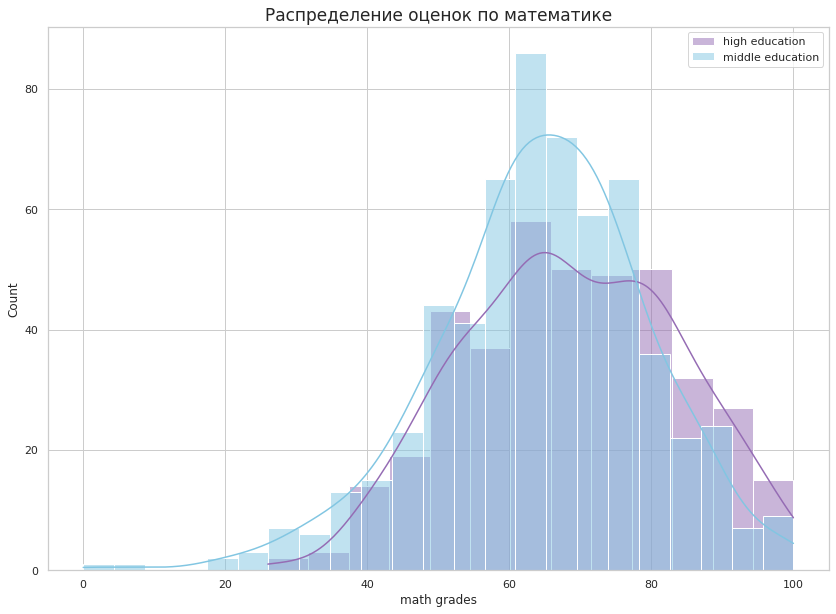

In [6]:
plt.figure(figsize = (14, 10))
plt.title("Распределение оценок по математике", size = 17)
sns.histplot(high_educated, kde = True, label = "high education", color = "m")
sns.histplot(low_educated, kde = True, label = "middle education", color = "c")
plt.xlabel("math grades")
plt.legend();

In [7]:
high_educated.shape, low_educated.shape

((399,), (601,))

Видим, что на взгляд распределения не отличаются. Более того, оба похожи на нормальные, но со смещением среднего (правый хвост меньше). Также заметим, что выборки несбалансированны - больше людей со средним образованием (почти в 2 раза)

Проверим выборки на дисперсию - если они примерно одинаковы, то можно провести тест Стьюдента!

In [8]:
np.std(high_educated), np.std(low_educated)

(15.034082714537947, 15.004510475846333)

In [9]:
tstat, tpval = sts.ttest_ind(high_educated, low_educated, equal_var = False, 
                             alternative = "greater", random_state = 17)
tstat, tpval

(4.309042859193758, 9.155018364116071e-06)

In [10]:
np.mean(high_educated), np.mean(low_educated)

(68.60401002506266, 64.41930116472545)

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Был выбран односторонний тест Стьюдента.
Предпосылки:
* Данные похоже на то, что нормально распределены (но на самом деле это не точно, у high edicated какая-то бимодальность, но непараметрический манн уитни с такими еще хуже работает)
* Дисперсии у выборок примерно схожи (это очень удивительно, как единорога увидел)
* Данные независимо распределены (такое утверждать нельзя... но не понятно, как выборки могут быть еще связаны - если у них разное образование, то и учились они в разных школах. Тем не менее, вряд ли оценки "умных" как-то повлияют на оценки "средних", разве что первые не дадут списать последним) )

Тем не менее, с таким тестом гипотеза о равенстве средних отвергается в пользу альтернативной гипотезы - ученики с высшим образованием в среднем пишут экзамен по матану лучше, чем ученики со средним образованием (на уровне значимости 0.01 даже..)

__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [11]:
reading = df["reading score"].to_numpy()
math = df["math score"].to_numpy()

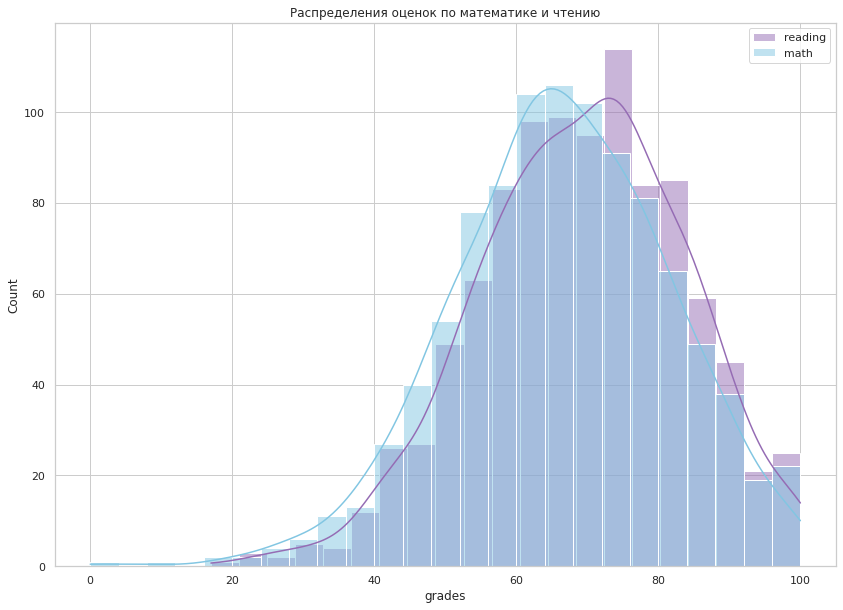

In [12]:
# смотрим на распределение
plt.figure(figsize = (14, 10))
plt.title("Распределения оценок по математике и чтению")
sns.histplot(reading, kde = True, label = "reading", color = "m")
sns.histplot(math, kde = True, label = "math", color = "c")
plt.xlabel("grades")
plt.legend();

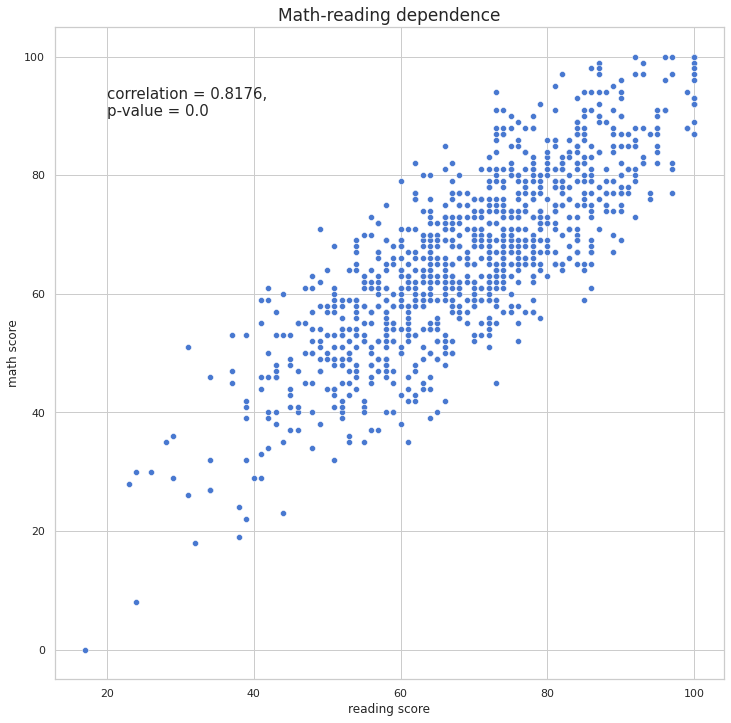

In [13]:
# проверка на независимость!
corr, pval = sts.pearsonr(reading, math)
plt.figure(figsize = (12, 12))
ax = sns.scatterplot(x = reading, y = math)
plt.xlabel("reading score")
plt.ylabel("math score")
plt.title("Math-reading dependence", size = 17)

ax.text(20, 90, f'''correlation = {round(corr, 4)}, 
p-value = {round(pval, 4)}''',
        fontsize=15);

О нет! Наши данные линейно зависимы, еще и с высокой значимостью! Значит, что наш z-тест, обычный t-тест и даже Манн Уитни не будут корректно работать, ведь они подразумевают независимость(

Как же хорошо, что существует парный t-тест! Наши данные как раз зависимы из-за того, что оценки получены для каждого человека как по чтению, так и по математике. 

In [14]:
sts.ttest_rel(reading, math)

Ttest_relResult(statistic=10.816230631665421, pvalue=7.322335900414138e-26)

In [15]:
np.mean(reading), np.mean(math)

(69.169, 66.089)

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Был выбран парный двусторонний тест Стьюдента. Предпосылки:
* Данные попарно зависимы. Это видно по высокой корреляции Пирсона с высокой степенью достоверности, да и просто глазами на графике. Это и объясняется легко - в среднем если студент усердный / умный / хитрый, то оба теста он напишет хорошо; если ленивый / усталый / переживающий и т.п. - оба теста напишет плохо (да бывают исключения, но В СРЕДНЕМ так)
* Данные нормально распределены + размер выборки достаточно большой

## Задача №2:  О мышах и людях

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/vagon.jpeg?raw=true" width="400" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек: $1$, если на бумаге и $2$, если реальную (comm: почему не 0/1?)
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [16]:
df = pd.read_csv('mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

In [17]:
# тут что-то в условии перепутали..
button = df[df["STUDY"] == 1]["DECISION"].to_numpy()
paper = df[df["STUDY"] == 2]["DECISION"].to_numpy()

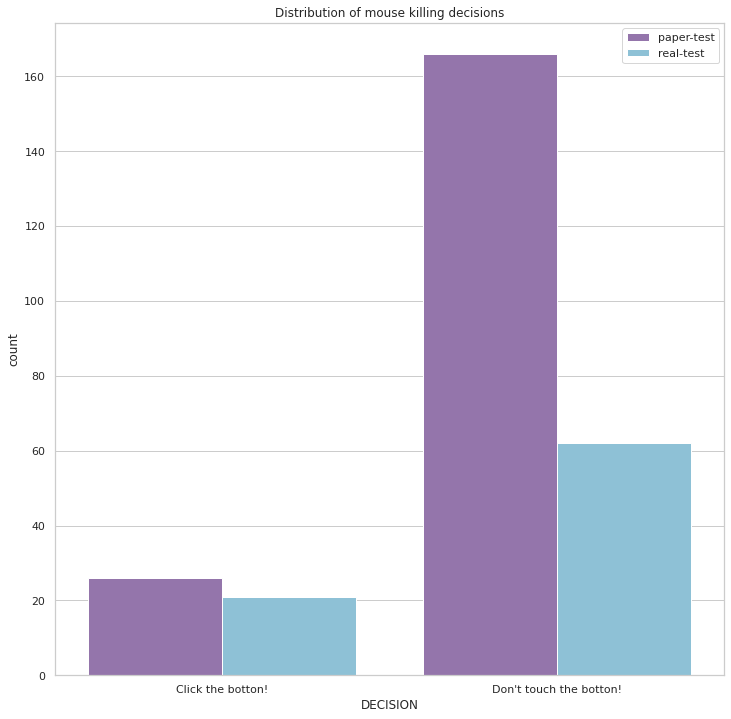

In [18]:
plt.figure(figsize = (12, 12))
ax = sns.countplot(data=df, x="DECISION", hue="STUDY",
             palette = ["m", "c"])

plt.title("Distribution of mouse killing decisions")
ax.legend(["paper-test", "real-test"])
ax.set(xticklabels = ["Click the botton!", "Don't touch the botton!"]);

In [19]:
button.shape, paper.shape

((192,), (83,))

тут что-то перепуталось?? в описании не так(

In [20]:
np.sum(button == 0)

26

In [21]:
# ну так как распределение биномиальное
matrix_fisher = np.array([
    [np.sum(paper == 0), np.sum(paper == 1)],
    [np.sum(button == 0), np.sum(button == 1)]
])

pd.DataFrame(matrix_fisher,
            index = ["test-on-paper", "real-test"],
            columns = ["kill 1 mouse", "kill 5 mice"])

,kill 1 mouse,kill 5 mice
test-on-paper,21,62
real-test,26,166


In [22]:
stat, p = sts.fisher_exact(matrix_fisher, alternative='greater')
round(stat, 5), round(p, 5)

(2.16253, 0.01539)

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Фишер смотрит, равна ли доля "удач" между экспериментами. В нашем случае удача - нажать на кнопку (действительно ли это так - философский вопрос конечно.. мы сами принимаем решение о том, чтобы убить 1 мышь, в то время как убийство 5х мышей было предопределено заранее). В общем, его H_0 такова, что доля не меняется, т.е. $p_1 = p_2$. Альтернативную гипотезу ставим как greater (т.е. $p_1 > p_2$, то есть на бумаге жмут кнопку чаще - люди смелее...).

В целом, так и получилось на уровне значимости 0.05. Наш $p-value$ получился 0.015, поэтому можем отвергнуть $H_0$ в пользу альтернативной. Получается, что на бумаге люди решаются нажать на кнопку, видимо ссылаясь на количество пострадавших (5 против 1)

__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

In [23]:
decision_time = df.RT.to_numpy()
# убираем наны
decision_time = decision_time[~np.isnan(decision_time)]

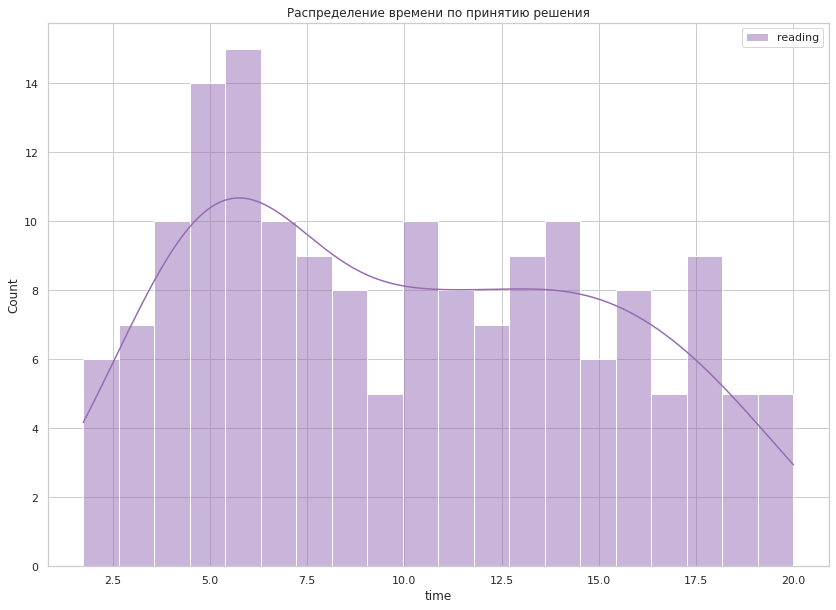

In [175]:
# смотрим на распределение
plt.figure(figsize = (14, 10))
plt.title("Распределение времени по принятию решения")
sns.histplot(decision_time, bins = 20, kde = True, label = "reading", color = "m")
plt.xlabel("time")
plt.legend();

In [172]:
alpha = 0.05
mean_time = decision_time.mean()
std_time = sts.tstd(decision_time)

sts.ttest_1samp(decision_time, popmean = 5, alternative = "greater")

Ttest_1sampResult(statistic=12.974895950977869, pvalue=2.7586881778173365e-27)

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__  Честно, сомневаюсь о том, что данные распределены нормально, как-то они не очень похожи на нормальное распределение. Провел оодносторонний тест Стьюдента. При альтернативной гипотезе, что среднее больше чем 5, получил pvalue < 0.05, то есть отвергаем нулеовую гипотезу о том, что среднее <=  5 в пользу альтернативной, что среднее > 5. 

## Задача №3:  Парадокс

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='left'>

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [26]:
# A - принимали лекарство, nonA - нет
healthy_man_A = 770 / 1650
healthy_man_nonA = 88 / 223

print(f"""Доля выздоровевших мужчин, принимавших лекарство: {round(healthy_man_A, 5)}, 
Доля выздоровевших мужчин, не принимавших лекарство: {round(healthy_man_nonA, 5)}""")

Доля выздоровевших мужчин, принимавших лекарство: 0.46667, 
Доля выздоровевших мужчин, не принимавших лекарство: 0.39462


Доля выздоровевших мужчин, принимвших лекарство выше доли выздоровевших мужчин, не принимавших лекарство. То есть по долям можно сказать, что лекарство помогает.

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин 

(comm: прочему-то тут не частоты,  а абсолютные значения но ладно..)

In [27]:
men = np.array([[770 , 880],
                [88, 135]])

men2 = men / np.array([[1650], [223]])

In [28]:
men2

array([[0.46666667, 0.53333333],
       [0.39461883, 0.60538117]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [29]:
stat, pval, _, exp_chi2 = sts.chi2_contingency(observed = men, 
                                        correction=False)
pval

0.04268446899604581

In [30]:
exp_chi2

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

Вывод - распределения выздоровевших и невыздоровевших между мужчинами, принимавшими и не принимавшими лекарство, отличаются. То есть все же заметна разница между **числом** выздоровевших мужчин, принимавших лекарство и не принимавшими лекарство.

__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [31]:
N = men.sum()
N

1873

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [32]:
n1, n2 = men.sum(axis = 1)
n1, n2

(1650, 223)

Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [33]:
n_b1, n_b2 = men.sum(axis = 0)
print(f"""Вероятность выздороветь: {n_b1 / N}, 
Вероятность не выздороветь: {n_b2 / N}""")

Вероятность выздороветь: 0.4580886278697277, 
Вероятность не выздороветь: 0.5419113721302723


Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [42]:
# n1 - мужчины, принимавшие лекарство
# n2 - мужчины, не принимавшие лекарство
# n_b1 / N - вероятность выздороветь
# n_b2 / N - вероятность не выздороветь

exp = np.array([
    [n1 * n_b1 / N, n1 * n_b2 / N],
    [n2 * n_b1 / N, n2 * n_b2 / N]
])

exp

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

In [43]:
exp_chi2

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

вжух

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [44]:
chi_stat = np.sum((men - exp)**2 / exp)

In [45]:
# статистика совпадает
stat == chi_stat

True

In [46]:
my_pval = 1 - sts.chi2.cdf(chi_stat, df = 1)

In [47]:
# pvalue тоже:)
np.allclose(my_pval, pval)

True

In [48]:
my_pval, pval

(0.04268446899604583, 0.04268446899604581)

__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [49]:
women = np.array([[165 , 80],
                [440, 310]])

women2 = women / np.array([[165 + 80], [440 + 310]])

In [50]:
women

array([[165,  80],
       [440, 310]])

In [51]:
stat_w, pval_w, _, exp_chi2_w = sts.chi2_contingency(
    observed = women, correction=False)
pval

0.04268446899604581

In [52]:
# A - принимали лекарство, nonA - нет
healthy_woman_A = 165 / (165 + 80)
healthy_woman_nonA = 440 / (440 + 310)

print(f"""Доля выздоровевших женщин, принимавших лекарство: {round(healthy_woman_A, 5)}, 
Доля выздоровевших женщин, не принимавших лекарство: {round(healthy_woman_nonA, 5)}""")

Доля выздоровевших женщин, принимавших лекарство: 0.67347, 
Доля выздоровевших женщин, не принимавших лекарство: 0.58667


Доля выздоровевших женщин, принимвших лекарство выше доли выздоровевших женщин, не принимавших лекарство. То есть по долям можно сказать, что лекарство помогает.

Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [53]:
stat_w, pval_w, _, exp_chi2_w = sts.chi2_contingency(
    observed = women, correction=False)
pval_w

0.015679686056826774

На уровне значимости 0.05 можно скзаать, что эффект есть! (отвергаем 0 гипотезу об отсутствии эффекта лекарства = схожести распределений женщин принимавших и не принимавших лекарство)

__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [54]:
# создаем табличку
people = men + women

# смотрим по долям
healthy_people_A = 935 / (935 + 960)
healthy_people_nonA = 528 / (528 + 445)

print(f"""Доля выздоровевших людей, принимавших лекарство: {round(healthy_people_A, 5)}, 
Доля выздоровевших людей, не принимавших лекарство: {round(healthy_people_nonA, 5)}""")

# смотрим 
stat_all, pval_all, _, exp_chi2_all = sts.chi2_contingency(
    observed = people, correction=False)

print(f"p-val: {pval_all}")

Доля выздоровевших людей, принимавших лекарство: 0.4934, 
Доля выздоровевших людей, не принимавших лекарство: 0.54265
p-val: 0.012492547994073244


Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

Нет.. Получается, что наоборот люди, не принимавшие лекарство, наоборот выздоравливают чаще, чем люди, его принимавшие. Это потому, что среди мужчин больше тех, кто принимал лекарство, когда среди женщин - тех, кто не принимал лекарство. При этом доля невыздоровевших мужчин больше, чем доля невыздоровевших женщин. 

То есть мужчин, принимавших лекарство было больше (чем непринимавших), и доля невыздоровевших тоже была больше, из-за чего при сложении получилось так, что стало больше людей, принимавших лекарство и не выздоровевших (от мужчин) и не принимавших лекарство, но выздоровевших (от женщин). В общем мы складывали числа, которые не очень корректно складывать, так как доля выздоровления среди М и Ж отличается... и отличается соотношение групп принимавших и не принимаших лекарство..

а это внизу написано.) но покрасивше конечно

In [55]:
women, men, people

(array([[165,  80],
        [440, 310]]),
 array([[770, 880],
        [ 88, 135]]),
 array([[935, 960],
        [528, 445]]))

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [60]:
muA, sigmaA, sigmaB = 100, 40, 20
mde = 5
alpha, beta = 0.05, 0.2

def group_amount(std1, std2, alpha, beta, mde):
    zscores = (sts.norm.ppf(1- alpha/2) + sts.norm.ppf(1- beta))**2
    deviations = (std1**2 + std2**2)
    return (zscores * deviations) / (mde**2)


N = 2 * group_amount(sigmaA, sigmaB, alpha, beta, mde)
days = int(N / 200)

print(f"Необходимое общее количество людей: {int(N)}")
print(f"Необходимое количество дней: {days}")

Необходимое общее количество людей: 1255
Необходимое количество дней: 6


__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [59]:
muB = 105

sampleA = np.random.normal(muA, sigmaA, 200)
sampleB = np.random.normal(muB, sigmaB, 200)

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [81]:
X = 50
ab_results = pd.DataFrame(np.zeros((X, 3)),
                          columns = ["meanA", "meanB", "pvalue"],
                         index = np.arange(X))

for x in range(X):
    if x == 0:
        sampleA_dayx = np.random.normal(muA, sigmaA, 200)
        sampleB_dayx = np.random.normal(muB, sigmaB, 200)
    else:
        sampleA_dayx = np.hstack((sampleA_dayx, 
                                  np.random.normal(muA, sigmaA, 200)))
        
        sampleB_dayx = np.hstack((sampleB_dayx, 
                                  np.random.normal(muB, sigmaB, 200)))
    
    ab_results.iloc[x, 0] = sampleA_dayx.mean()
    ab_results.iloc[x, 1] = sampleB_dayx.mean()    
    
    ab_results.iloc[x, 2] = sts.ttest_ind(sampleA_dayx, 
                                          sampleB_dayx, 
                                          alternative = "less")[1]

In [83]:
ab_results.head()

,meanA,meanB,pvalue
0,98.698504,104.243071,0.043537
1,99.165798,104.401089,0.010382
2,99.010472,104.873581,0.000731
3,98.286410,104.341259,0.000060
4,98.708233,103.706254,0.000229


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

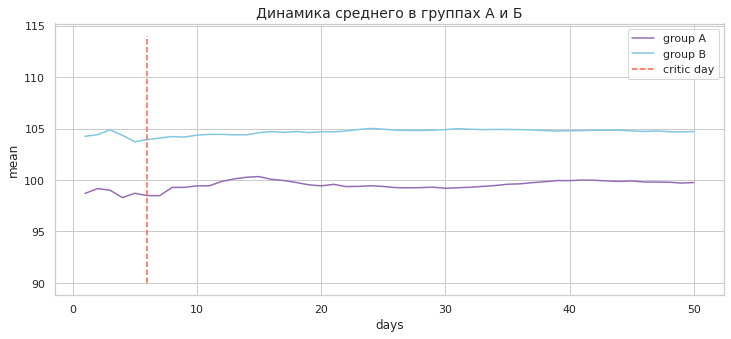

In [127]:
plt.figure(figsize = (12, 5))
sns.lineplot(x = np.arange(1, X+1), y = ab_results["meanA"],
            color = "m", label = "group A")
sns.lineplot(x = np.arange(1, X+1), y = ab_results["meanB"],
            color = "c", label = "group B")
plt.plot([days]* 25, np.arange(90, 115), 
             color = "tomato", linestyle = "dashed",
                label = "critic day")

plt.xlabel("days")
plt.ylabel("mean")
plt.legend()
plt.title("Динамика среднего в группах А и Б",
         size = 14);

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

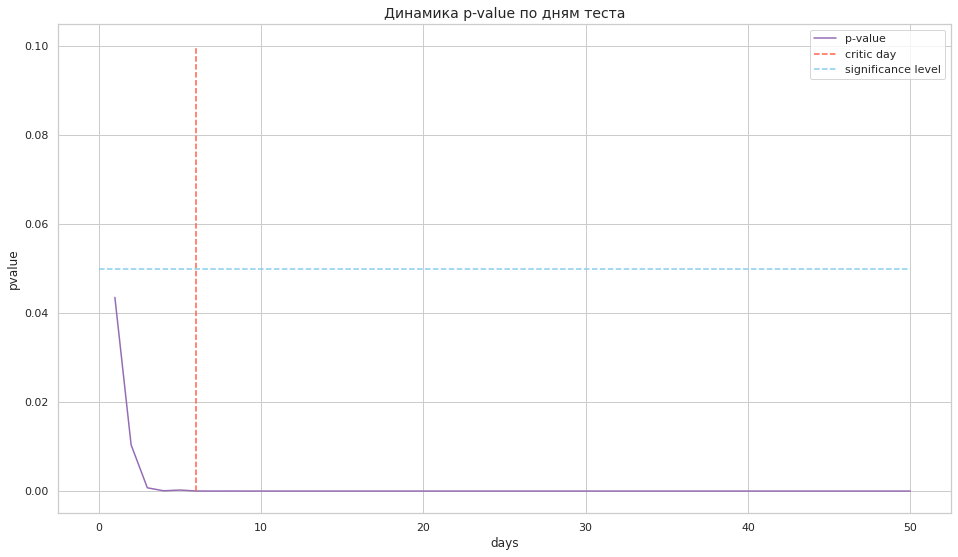

In [117]:
plt.figure(figsize = (16, 9))
sns.lineplot(x = np.arange(1, X+1), y = ab_results["pvalue"],
            color = "m", label = "p-value")

plt.plot([days]* 2, [0, 0.1], 
             color = "tomato", linestyle = "dashed",
                label = "critic day")

plt.plot(np.arange(X + 1), [alpha] * (X + 1), 
             color = "skyblue", linestyle = "dashed",
                label = "significance level")

plt.xlabel("days")
plt.ylabel("pvalue")
plt.legend()
plt.title("Динамика p-value по дням теста", size = 14);

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

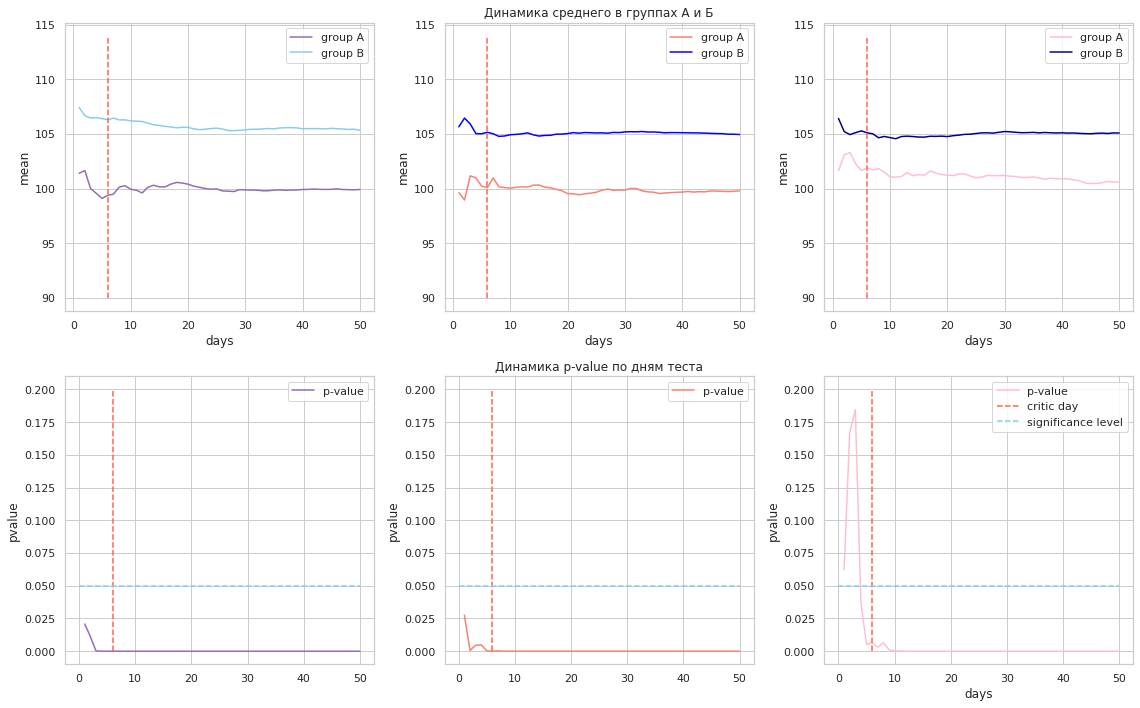

In [161]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))
colors1 = ["m", "salmon", "pink"]
colors2 = ["skyblue", "blue", "darkblue"]

for i in range(3):
    X = 50
    ab_results = pd.DataFrame(np.zeros((X, 3)),
                              columns = ["meanA", "meanB", "pvalue"],
                             index = np.arange(X))

    for x in range(X):
        if x == 0:
            sampleA_dayx = np.random.normal(muA, sigmaA, 200)
            sampleB_dayx = np.random.normal(muB, sigmaB, 200)
        else:
            sampleA_dayx = np.hstack((sampleA_dayx, 
                                      np.random.normal(muA, sigmaA, 200)))

            sampleB_dayx = np.hstack((sampleB_dayx, 
                                      np.random.normal(muB, sigmaB, 200)))

        ab_results.iloc[x, 0] = sampleA_dayx.mean()
        ab_results.iloc[x, 1] = sampleB_dayx.mean()    

        ab_results.iloc[x, 2] = sts.ttest_ind(sampleA_dayx, 
                                              sampleB_dayx, 
                                              alternative = "less")[1]

    sns.lineplot(x = np.arange(1, X+1), y = ab_results["meanA"], label = "group A",
                    color = colors1[i], ax = axs[0][i])
    sns.lineplot(x = np.arange(1, X+1), y = ab_results["meanB"], label = "group B",
                    color = colors2[i], ax = axs[0][i])
    axs[0][i].plot([days]* 25, np.arange(90, 115), label = "critic day",
                     color = "tomato", linestyle = "dashed")

    axs[0][i].set_xlabel("days")
    axs[0][i].set_ylabel("mean")

    axs[0][1].set_title("Динамика среднего в группах А и Б")
    
    sns.lineplot(x = np.arange(1, X+1), y = ab_results["pvalue"],
                color = colors1[i], label = "p-value", ax = axs[1][i])

    axs[1][i].plot([days]* 2, [0, 0.2], 
                 color = "tomato", linestyle = "dashed",
                    label = "critic day")

    axs[1][i].plot(np.arange(X + 1), [alpha] * (X + 1), 
                 color = "skyblue", linestyle = "dashed",
                    label = "significance level")

    plt.xlabel("days")
    plt.ylabel("pvalue")
    
    axs[1][1].set_title('Динамика p-value по дням теста')

plt.tight_layout()
plt.legend();

До критического дня p-value постоянно колеблется - оно непостоянно. В основном оно уменьшается, но первые дни может даже увеличиваться. То есть если мы посмотрим на p-value до критического дня, то может быть такое, что мы не смодем отвергнуть нулевую гипотезу, тк pvalue превышает  критическое значение - риск схватить ошибку 2 рода. Но может наблюдаться и другая ситуация. Здесь в синтетическом примере мы сделали две выборки, где точно знаем, что верна альтернативная гипотеза. В жизни же мы этого не знаем - и даже если на деле верна нулевая гипотеза, но мы подглядываем в результаты теста до критического дня, мы можем увидеть pval < alpha и принять альтернативную. В общем нельзя подглядывать тогда, когда не нужно и тем более принимать решение заранее) Это совсем не круто

После критического дня pvalue выходит на плато и всегда $\approx$ 0. Можно задерживать эксперимент (на побольше дней), но не останавливаь раньше!

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

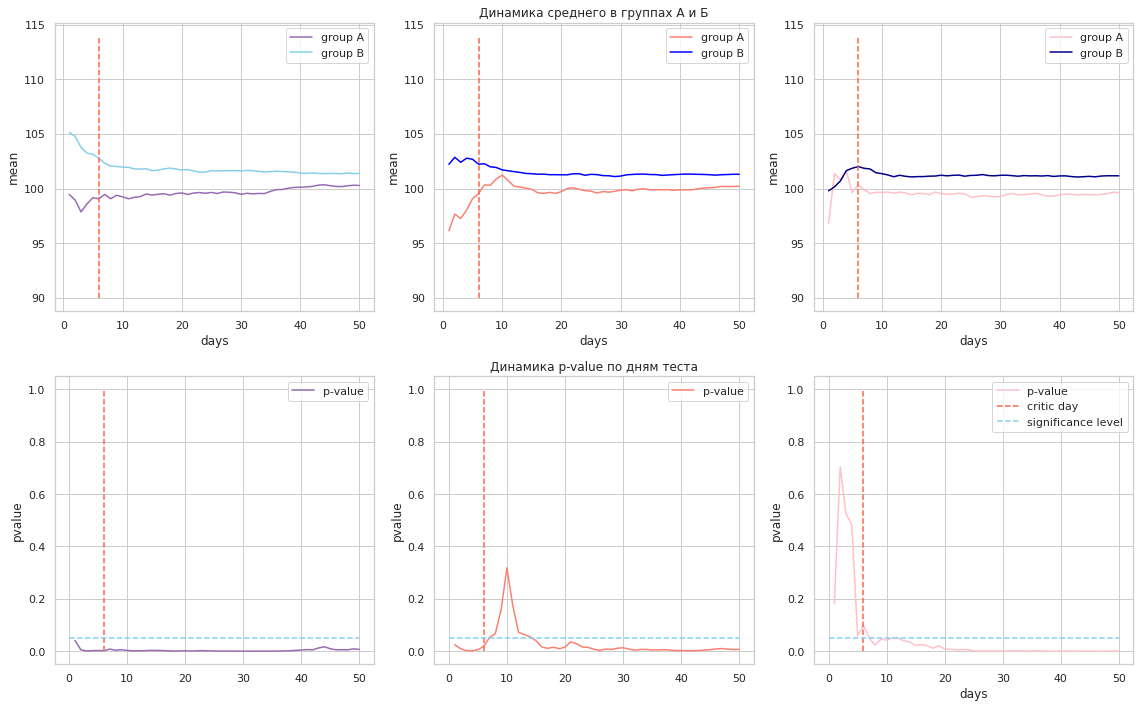

In [163]:
muB2_alt = 101

fig, axs = plt.subplots(2, 3, figsize = (16, 10))

for i in range(3):
    X = 50
    ab_results = pd.DataFrame(np.zeros((X, 3)),
                              columns = ["meanA", "meanB", "pvalue"],
                             index = np.arange(X))

    for x in range(X):
        if x == 0:
            sampleA_dayx = np.random.normal(muA, sigmaA, 200)
            sampleB_dayx = np.random.normal(muB2_alt, sigmaB, 200)
        else:
            sampleA_dayx = np.hstack((sampleA_dayx, 
                                      np.random.normal(muA, sigmaA, 200)))

            sampleB_dayx = np.hstack((sampleB_dayx, 
                                      np.random.normal(muB2_alt, sigmaB, 200)))

        ab_results.iloc[x, 0] = sampleA_dayx.mean()
        ab_results.iloc[x, 1] = sampleB_dayx.mean()    

        ab_results.iloc[x, 2] = sts.ttest_ind(sampleA_dayx, 
                                              sampleB_dayx, 
                                              alternative = "less")[1]

    sns.lineplot(x = np.arange(1, X+1), y = ab_results["meanA"], label = "group A",
                    color = colors1[i], ax = axs[0][i])
    sns.lineplot(x = np.arange(1, X+1), y = ab_results["meanB"], label = "group B",
                    color = colors2[i], ax = axs[0][i])
    axs[0][i].plot([days]* 25, np.arange(90, 115), label = "critic day",
                     color = "tomato", linestyle = "dashed")

    axs[0][i].set_xlabel("days")
    axs[0][i].set_ylabel("mean")

    axs[0][1].set_title("Динамика среднего в группах А и Б")
    
    sns.lineplot(x = np.arange(1, X+1), y = ab_results["pvalue"],
                color = colors1[i], label = "p-value", ax = axs[1][i])

    axs[1][i].plot([days]* 2, [0, 1], 
                 color = "tomato", linestyle = "dashed",
                    label = "critic day")

    axs[1][i].plot(np.arange(X + 1), [alpha] * (X + 1), 
                 color = "skyblue", linestyle = "dashed",
                    label = "significance level")

    plt.xlabel("days")
    plt.ylabel("pvalue")
    
    axs[1][1].set_title('Динамика p-value по дням теста')

plt.tight_layout()
plt.legend();

кринжа

Изменяя MDE, мы увеличиваем количество необходимых дней, которые нужны для "увиденья" (не могу подобрать синоним) эффекта! По формуле выше видно, что количество дней и MDE обратно пропорциональны!! Нам потребуется бОльшее количество наблюдений $\rightarrow$ большее количество дней!

Поэтому здесь p-value не успевается "устаканиться" до 6-го дня (которых достаточно для того, чтобы метрика прокрасилась с MDE = 5). Глядя в день 6, мы можем увидеть pval > alpha и принять нулевую гипотезу, которая не верна!

Вывод: подсчитывать количество людей, необходимых для эксперимента, и количество дней на основе этого и нашего трафика. 

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

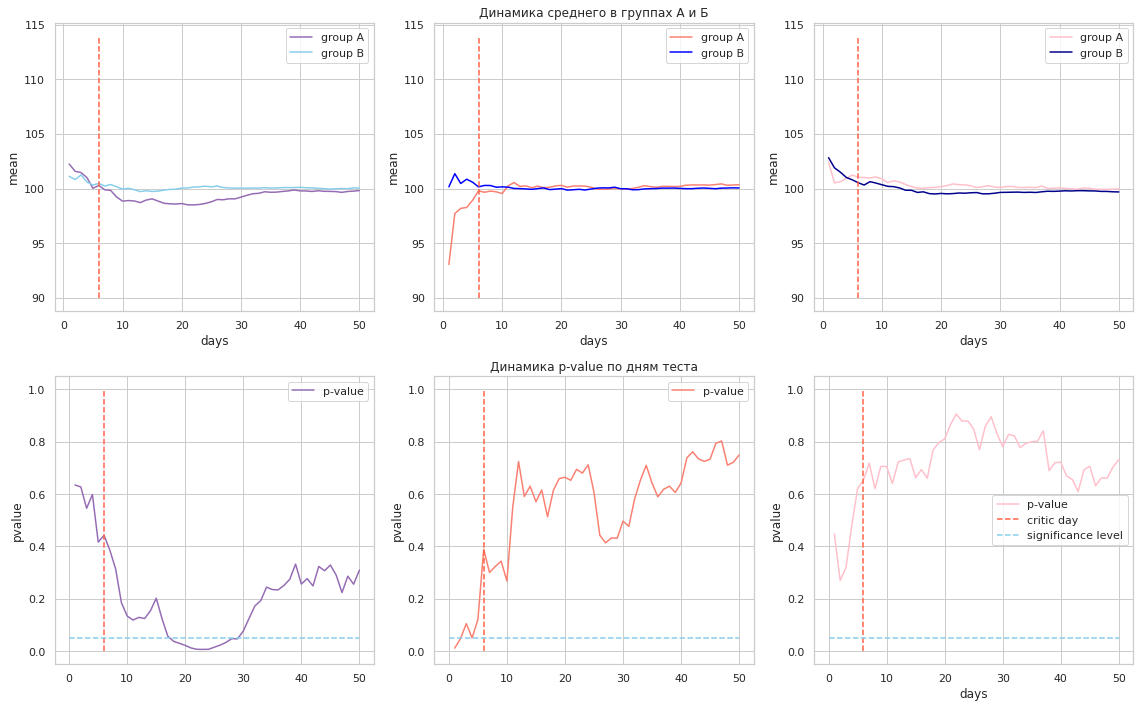

In [165]:
fig, axs = plt.subplots(2, 3, figsize = (16, 10))

for i in range(3):
    X = 50
    ab_results = pd.DataFrame(np.zeros((X, 3)),
                              columns = ["meanA", "meanB", "pvalue"],
                             index = np.arange(X))

    for x in range(X):
        if x == 0:
            sampleA_dayx = np.random.normal(muA, sigmaA, 200)
            sampleB_dayx = np.random.normal(muA, sigmaB, 200)
        else:
            sampleA_dayx = np.hstack((sampleA_dayx, 
                                      np.random.normal(muA, sigmaA, 200)))

            sampleB_dayx = np.hstack((sampleB_dayx, 
                                      np.random.normal(muA, sigmaB, 200)))

        ab_results.iloc[x, 0] = sampleA_dayx.mean()
        ab_results.iloc[x, 1] = sampleB_dayx.mean()    

        ab_results.iloc[x, 2] = sts.ttest_ind(sampleA_dayx, 
                                              sampleB_dayx, 
                                              alternative = "less")[1]

    sns.lineplot(x = np.arange(1, X+1), y = ab_results["meanA"], label = "group A",
                    color = colors1[i], ax = axs[0][i])
    sns.lineplot(x = np.arange(1, X+1), y = ab_results["meanB"], label = "group B",
                    color = colors2[i], ax = axs[0][i])
    axs[0][i].plot([days]* 25, np.arange(90, 115), label = "critic day",
                     color = "tomato", linestyle = "dashed")

    axs[0][i].set_xlabel("days")
    axs[0][i].set_ylabel("mean")

    axs[0][1].set_title("Динамика среднего в группах А и Б")
    
    sns.lineplot(x = np.arange(1, X+1), y = ab_results["pvalue"],
                color = colors1[i], label = "p-value", ax = axs[1][i])

    axs[1][i].plot([days]* 2, [0, 1], 
                 color = "tomato", linestyle = "dashed",
                    label = "critic day")

    axs[1][i].plot(np.arange(X + 1), [alpha] * (X + 1), 
                 color = "skyblue", linestyle = "dashed",
                    label = "significance level")

    plt.xlabel("days")
    plt.ylabel("pvalue")
    
    axs[1][1].set_title('Динамика p-value по дням теста')

plt.tight_layout()
plt.legend();

Вообще распределение p-value при верности H0 равномерное. Оно модет получится меньше уровня значимости в какой-то день, т.к. у данных как минимум разная дисперсия. К тому же в двух группах могут получиться пользователи, как бы отклоняющиеся от среднего, из-за чего и можем получить ложноположительный результат

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [166]:
def get_lastpval(days):
    sampleA_AA = np.random.normal(muA, sigmaA, 200*days)
    sampleB_AA = np.random.normal(muA, sigmaB, 200*days)
    pval = sts.ttest_ind(sampleA_AA, sampleB_AA, alternative = "less")[1]
    return pval

In [167]:
pvalues_AA = [get_lastpval(50) for _ in range(1000)]

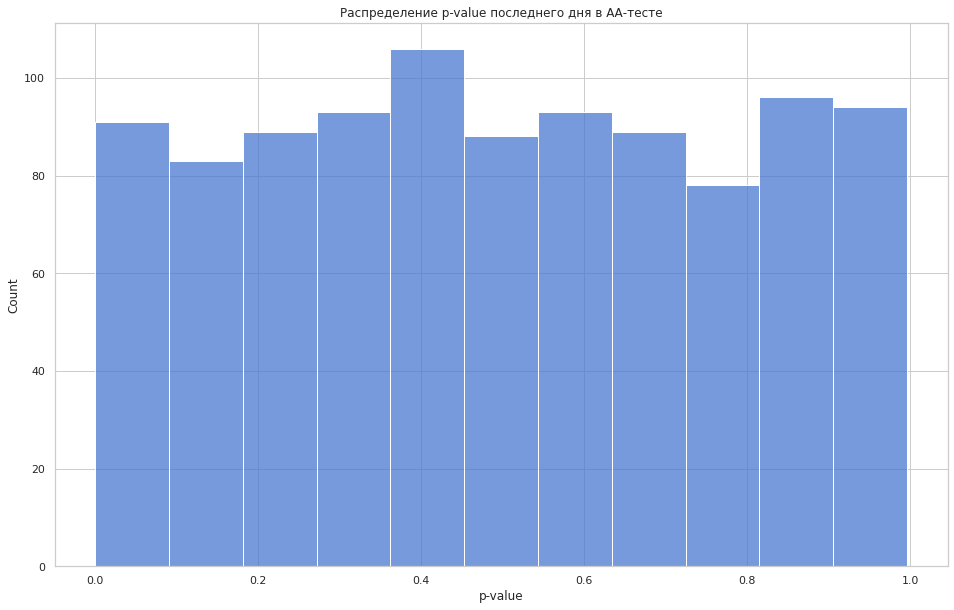

In [170]:
plt.figure(figsize = (16, 10))
sns.histplot(pvalues_AA)
plt.title("Распределение p-value последнего дня в АА-тесте")
plt.xlabel("p-value");

Вот мы и видим, что распределение в АА-тесте должно быть равномерным (при верной нулевой гипотезе). 